In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv")
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
data.shape

(30, 17)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [9]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<Axes: xlabel='W', ylabel='count'>

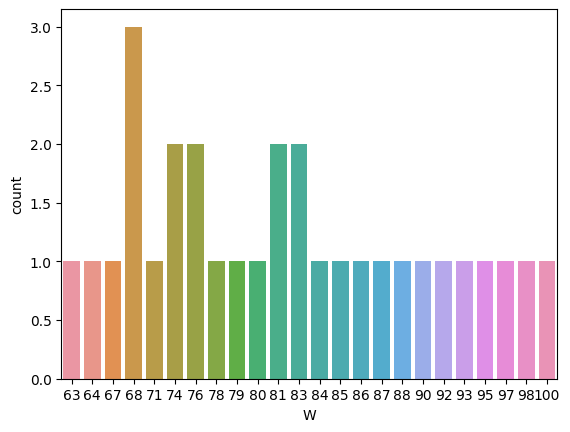

In [10]:
sns.countplot(x='W', data=data)

array([[<Axes: title={'center': 'W'}>, <Axes: title={'center': 'R'}>,
        <Axes: title={'center': 'AB'}>, <Axes: title={'center': 'H'}>],
       [<Axes: title={'center': '2B'}>, <Axes: title={'center': '3B'}>,
        <Axes: title={'center': 'HR'}>, <Axes: title={'center': 'BB'}>],
       [<Axes: title={'center': 'SO'}>, <Axes: title={'center': 'SB'}>,
        <Axes: title={'center': 'RA'}>, <Axes: title={'center': 'ER'}>],
       [<Axes: title={'center': 'ERA'}>, <Axes: title={'center': 'CG'}>,
        <Axes: title={'center': 'SHO'}>, <Axes: title={'center': 'SV'}>],
       [<Axes: title={'center': 'E'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

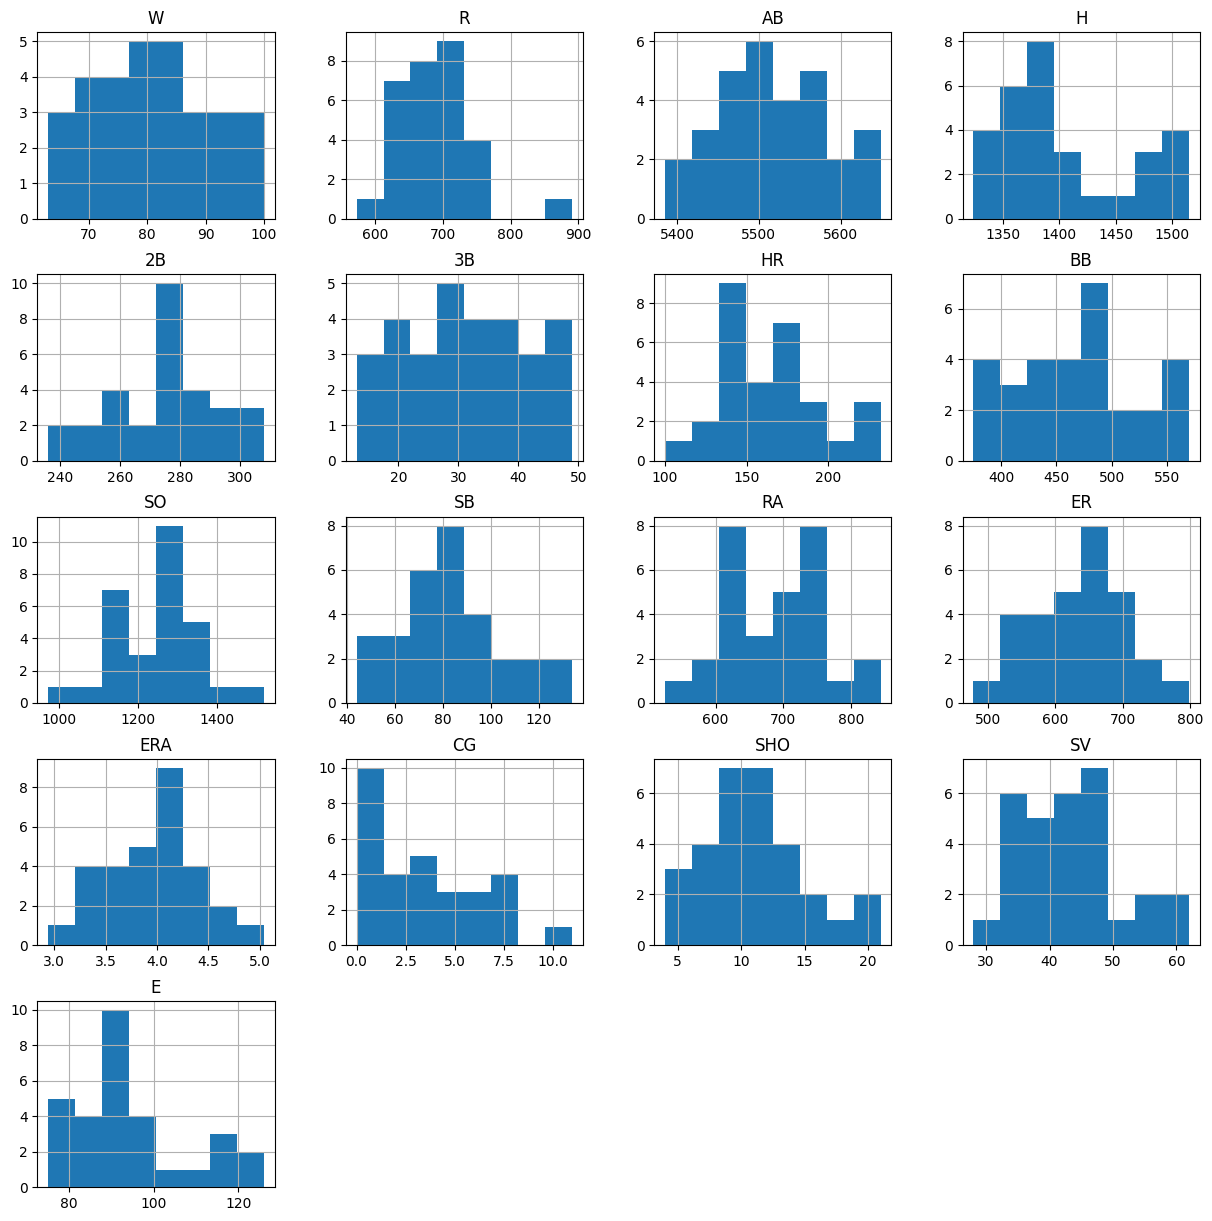

In [12]:
data.hist(bins=8, figsize=(15,15))

W          Axes(0.125,0.77;0.227941x0.11)
R       Axes(0.398529,0.77;0.227941x0.11)
AB      Axes(0.672059,0.77;0.227941x0.11)
H         Axes(0.125,0.638;0.227941x0.11)
2B     Axes(0.398529,0.638;0.227941x0.11)
3B     Axes(0.672059,0.638;0.227941x0.11)
HR        Axes(0.125,0.506;0.227941x0.11)
BB     Axes(0.398529,0.506;0.227941x0.11)
SO     Axes(0.672059,0.506;0.227941x0.11)
SB        Axes(0.125,0.374;0.227941x0.11)
RA     Axes(0.398529,0.374;0.227941x0.11)
ER     Axes(0.672059,0.374;0.227941x0.11)
ERA       Axes(0.125,0.242;0.227941x0.11)
CG     Axes(0.398529,0.242;0.227941x0.11)
SHO    Axes(0.672059,0.242;0.227941x0.11)
SV         Axes(0.125,0.11;0.227941x0.11)
E       Axes(0.398529,0.11;0.227941x0.11)
dtype: object

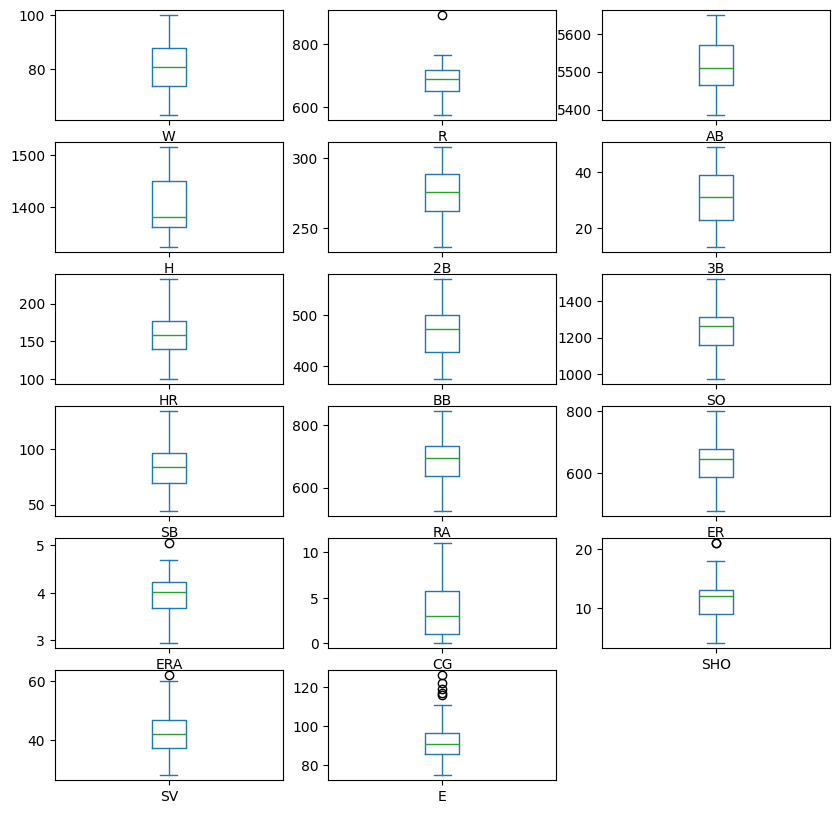

In [14]:
data.plot(kind='box', subplots=True, layout=(6,3), figsize=(10,10))

# Understanding Feature Relationships

<Axes: >

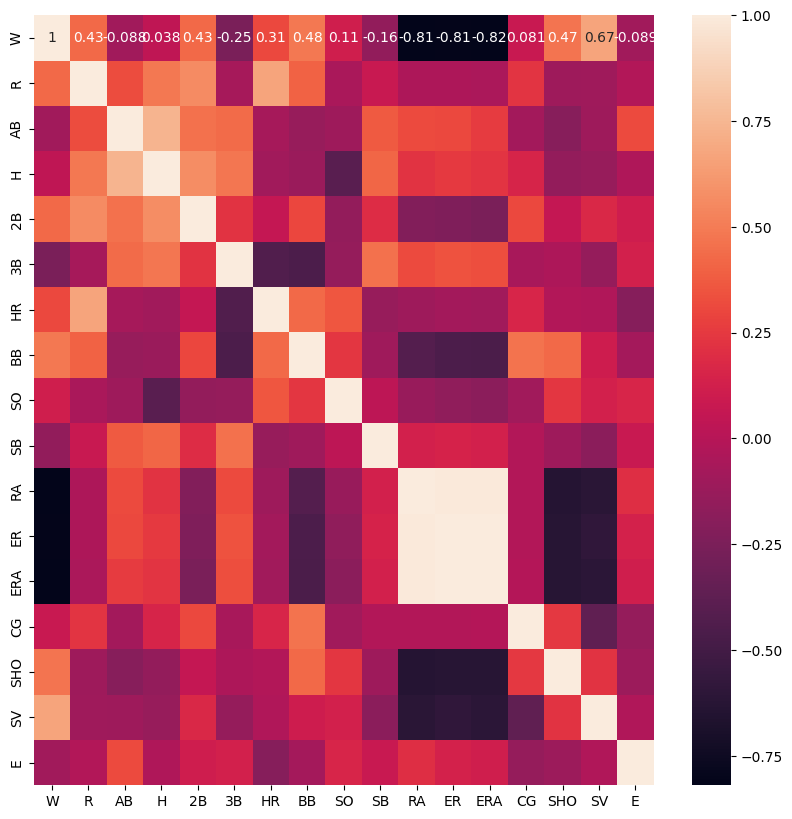

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True), annot=True)

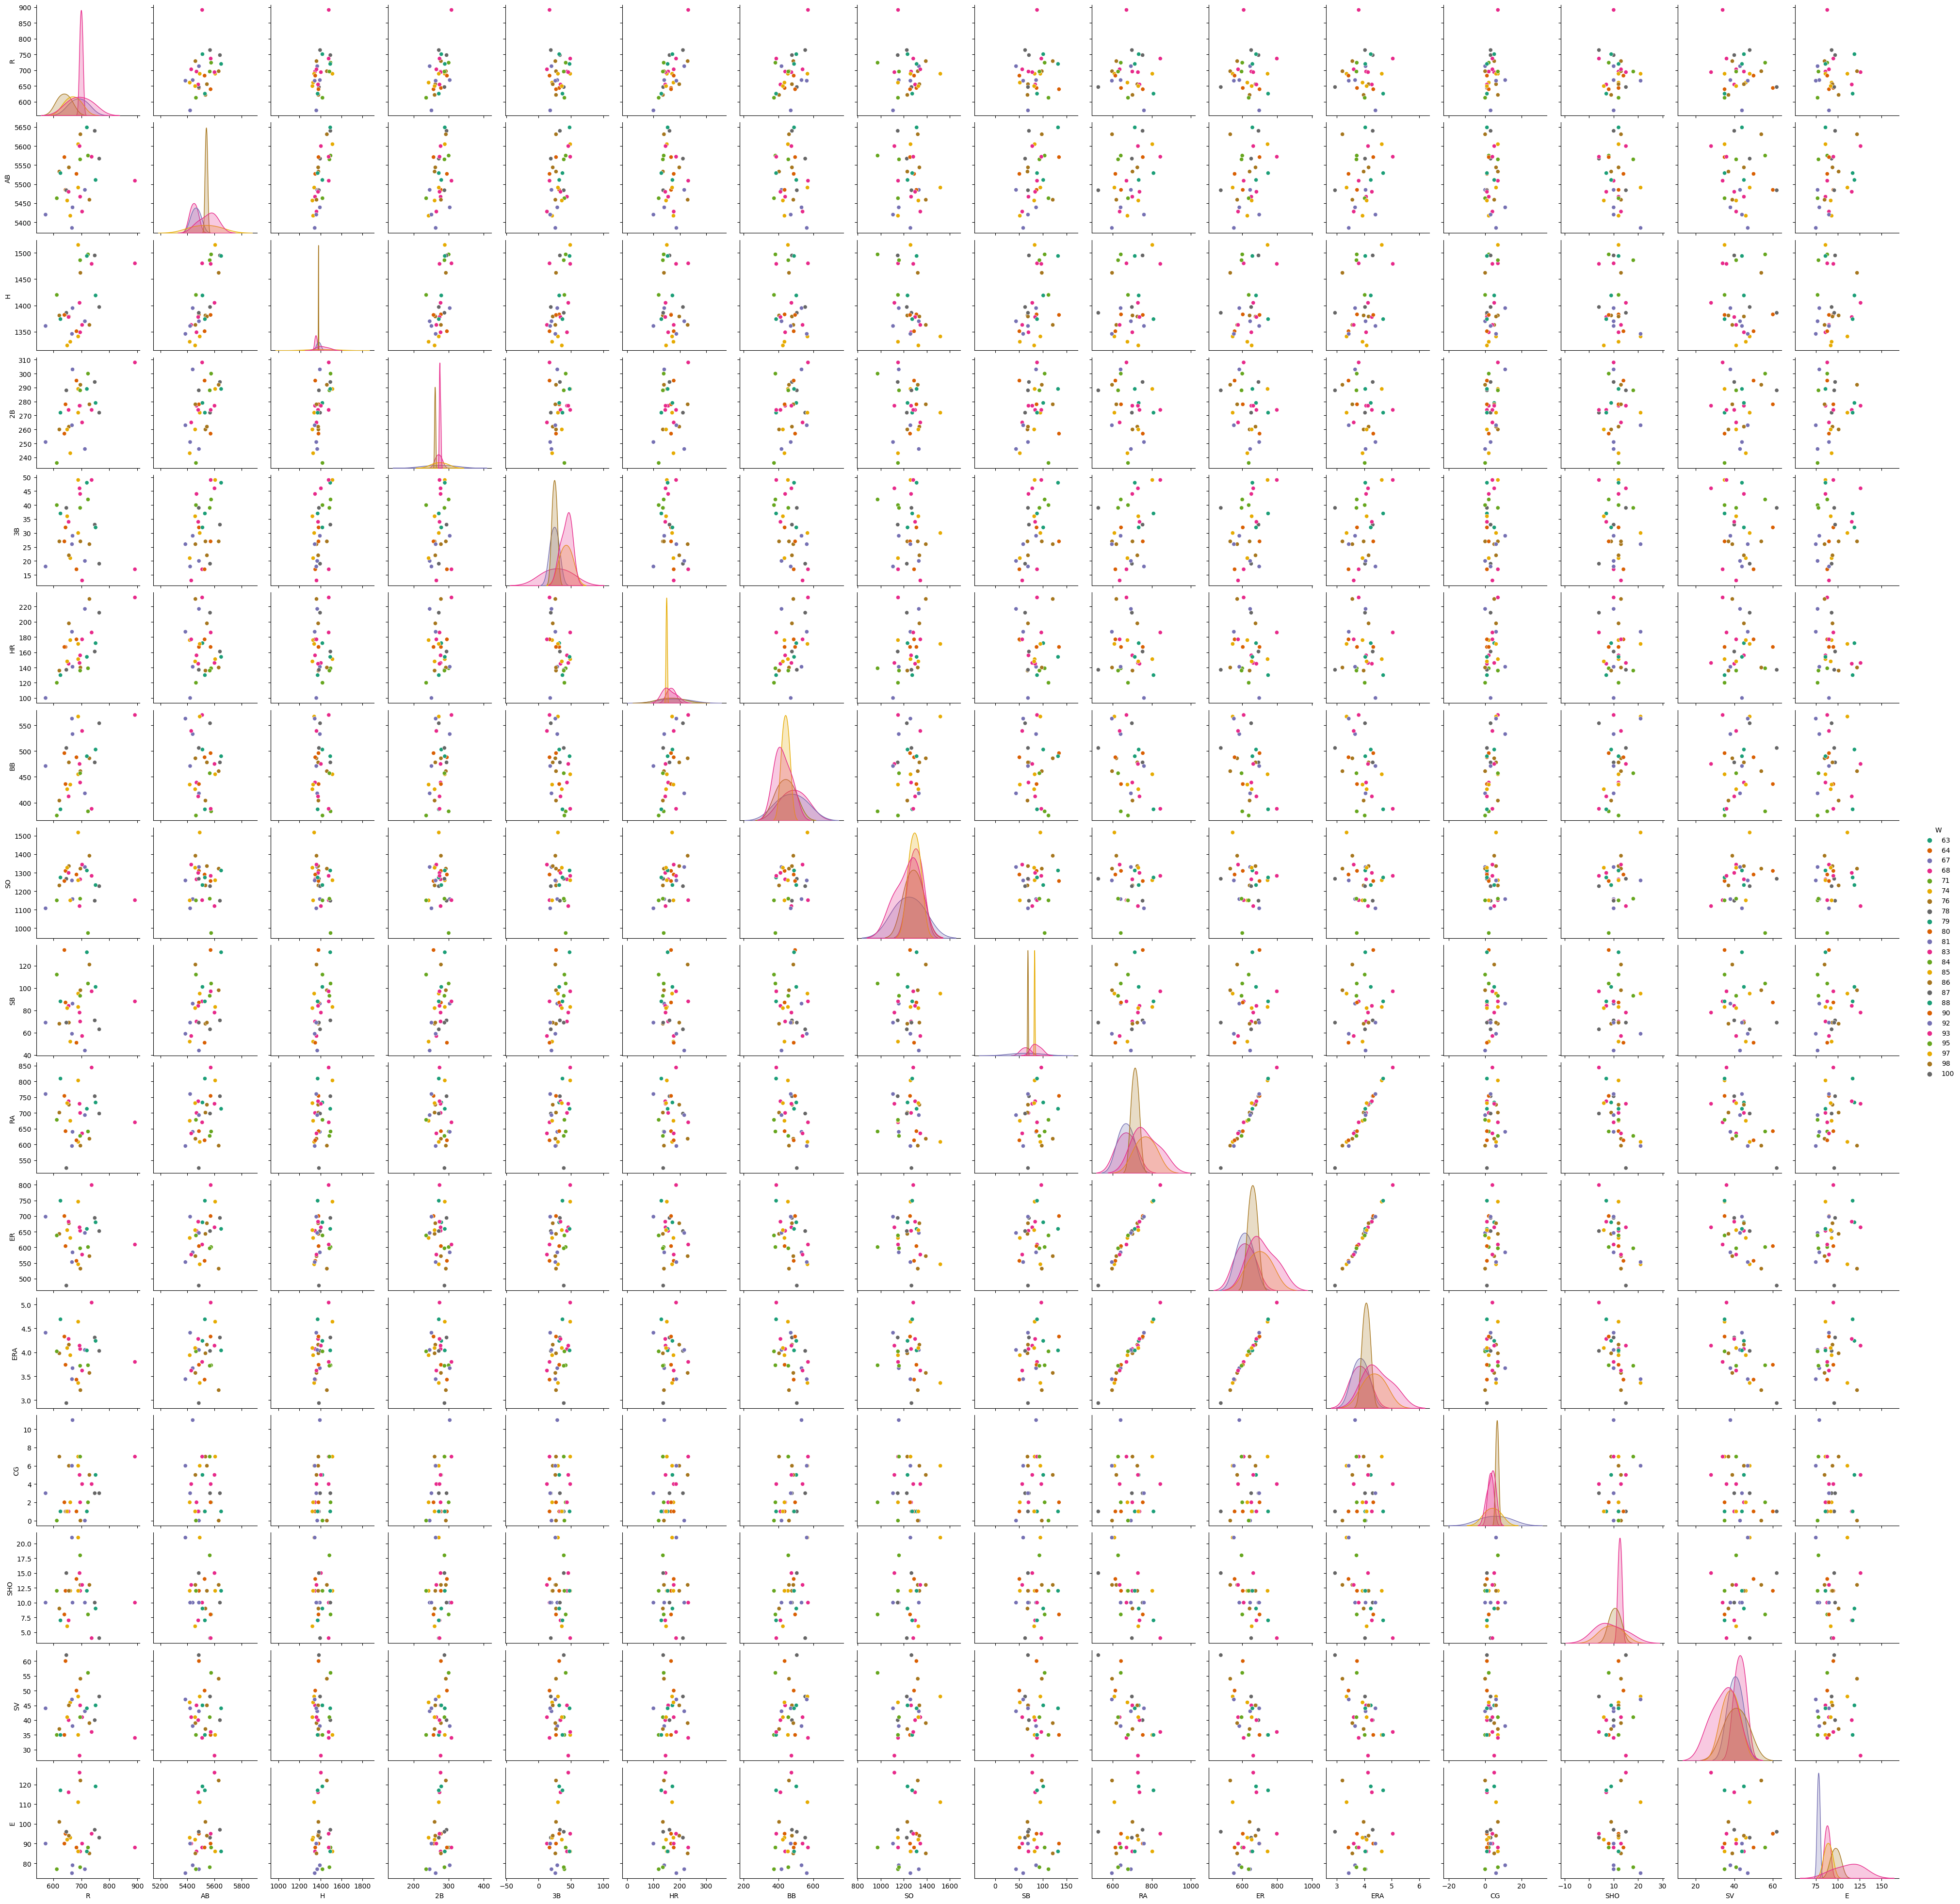

In [19]:
sns.pairplot(data, palette="Dark2", hue='W')

In [18]:
# Checking for Skewness
data_skew = data.skew()
data_skew

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [21]:
#Removing Skewness

for index, value in data_skew.iteritems():
    if value > 0.5 or value < -0.5:
        data[index] = np.cbrt(data[index])
data.skew()

W      0.047089
R      0.892970
AB     0.183437
H      0.642599
2B    -0.230650
3B     0.129502
HR     0.175310
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -1.043632
SHO   -0.280283
SV     0.325143
E      0.719735
dtype: float64

In [22]:
#Assigning Feature 
x = data.drop(['W'], axis=1)
y = data[['W']]

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .25, random_state = 39)

# Model Creation

In [26]:
#Linear Regression
lr = LinearRegression()

In [27]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [28]:
predictions = lr.predict(xtest)

In [30]:
mae = mean_absolute_error(ytest,predictions)
mae

3.931830663010107

In [37]:
r_clf = Ridge(random_state = 39)

In [40]:
r_clf.fit(xtrain,ytrain)

Ridge(random_state=39)

In [41]:
predictions = r_clf.predict(xtest)

In [43]:
mae = mean_absolute_error(ytest,predictions)
mae

4.9093518577912185

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
grid_param = {'alpha':[.0001,.001,.01,.1,1,10],
             'fit_intercept': [True,False],
             'copy_X': [True,False],
             'tol' : [.0001,.001,.01,.1,1,10]}

In [46]:
grid_search = GridSearchCV(estimator=r_clf, param_grid=grid_param, cv=2, verbose=3)

In [48]:
grid_search.fit(xtrain,ytrain)

Fitting 2 folds for each of 144 candidates, totalling 288 fits
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.0001;, score=-0.519 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.0001;, score=-16.595 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.001;, score=-0.519 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.001;, score=-16.595 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.01;, score=-0.519 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.01;, score=-16.595 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.1;, score=-0.519 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.1;, score=-16.595 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=1;, score=-0.519 total time=   0.0s
[CV 2

GridSearchCV(cv=2, estimator=Ridge(random_state=39),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             verbose=3)

In [49]:
grid_search.best_params_

{'alpha': 10, 'copy_X': True, 'fit_intercept': False, 'tol': 0.0001}

In [51]:
Final_model = Ridge(alpha=10, copy_X=True, fit_intercept=True, tol=.0001)
Final_model.fit(xtrain,ytrain)

Ridge(alpha=10)

In [52]:
from sklearn.metrics import r2_score

rd_pred = Final_model.predict(xtest)
r2s=r2_score(ytest, rd_pred)
print('r2 score: ', r2s*100)

r2 score:  72.39083540239444
